In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combine = pd.merge(ride_data, city_data, on = "city")

# Display the data table for preview
combine.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

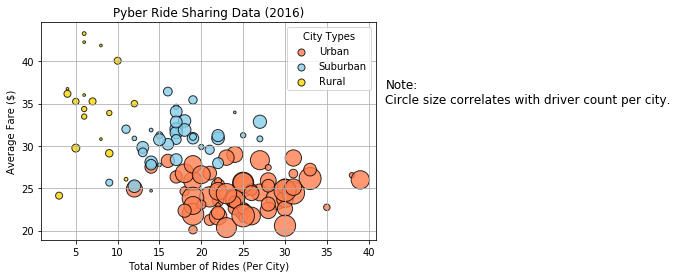

In [2]:
# Obtain the x and y coordinates for each of the three city types
# Urban City Type
urban = combine.loc[combine["type"] == "Urban",:].groupby("city")
urban_df = pd.DataFrame({"urban_avg_fare": urban["fare"].mean(),
                        "urban_total_ride": urban["ride_id"].count(),
                        "urban_drivers": urban["driver_count"].mean()})
urban_df

# Suburban City Type
suburban = combine.loc[combine['type'] == "Suburban",:].groupby("city")
suburban_df = pd.DataFrame({"suburban_avg_fare": suburban["fare"].mean(),
                        "suburban_total_ride": suburban["ride_id"].count(),
                        "suburban_drivers": suburban["driver_count"].mean()})
suburban_df

# Rural City Type
rural = combine.loc[combine['type'] == "Rural",:].groupby("city")
rural_df = pd.DataFrame({"rural_avg_fare": rural["fare"].mean(),
                        "rural_total_ride": rural["ride_id"].count(),
                        "rural_drivers": rural["driver_count"].mean()})
rural_df

# Build the scatter plots for each city types
ax = urban_df.plot(kind="scatter", x="urban_total_ride", y="urban_avg_fare", 
                   s=((urban["driver_count"].mean())*7).tolist(),
                   color="coral", edgecolors="black", alpha=0.8, label="Urban")
suburban_df.plot(kind="scatter", x="suburban_total_ride", y="suburban_avg_fare",
                 s=((suburban["driver_count"].mean())*7).tolist(),
                 color="skyblue", edgecolors="black", alpha=0.8, ax=ax, label="Suburban")
rural_df.plot(kind="scatter", x="rural_total_ride", y="rural_avg_fare",
              s=((rural["driver_count"].mean())*7).tolist(),
              color="gold", edgecolors="black", alpha=0.8, ax=ax, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
legend = plt.legend(title="City Types", loc="best")
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]
# Incorporate a text label regarding circle size
str = "Note:\nCircle size correlates with driver count per city."
plt.text(42, 35, str, fontsize=12)
# Save Figure
plt.savefig("../Images/Pyber_Ride_Sharing_Data")
# Show plot
plt.show()

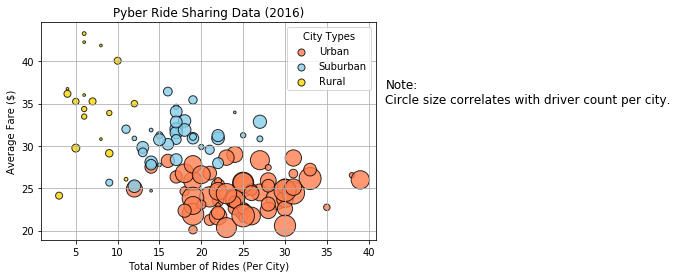

In [3]:
# Another way

# Urban City Type
urban = combine.loc[combine["type"] == "Urban",:].groupby("city")
urban_avg_fare = urban["fare"].mean()
urban_total_ride = urban["ride_id"].count()
urban_drivers = urban["driver_count"].mean()

# Suburban City Type
suburban = combine.loc[combine['type'] == "Suburban",:].groupby("city")
suburban_avg_fare = suburban["fare"].mean()
suburban_total_ride = suburban["ride_id"].count()
suburban_drivers = suburban["driver_count"].mean()

# Rural City Type
rural = combine.loc[combine['type'] == "Rural",:].groupby("city")
rural_avg_fare = rural["fare"].mean()
rural_total_ride = rural["ride_id"].count()
rural_drivers = rural["driver_count"].mean()


urban_handle = plt.scatter(urban_total_ride, urban_avg_fare, marker="o", alpha=0.8,
                           facecolors="coral", edgecolors="black", label="Urban", 
                           s=((urban["driver_count"].mean())*7).tolist())
suburban_handle = plt.scatter(suburban_total_ride, suburban_avg_fare, marker="o", alpha=0.8,
                              facecolors="skyblue", edgecolors="black", label="Suburban",
                             s=((suburban["driver_count"].mean())*7).tolist())
rural_handle = plt.scatter(rural_total_ride, rural_avg_fare, marker="o", alpha=0.8,
                              facecolors="gold", edgecolors="black", label="Rural",
                          s=((rural["driver_count"].mean())*7).tolist())
legend = plt.legend(loc="best", title="City Types")
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]

str2 = "Note:\nCircle size correlates with driver count per city."
plt.text(42, 35, str2, fontsize=12)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.grid()
plt.show()

## Total Fares by City Type

In [4]:
type_group = combine.groupby("type")

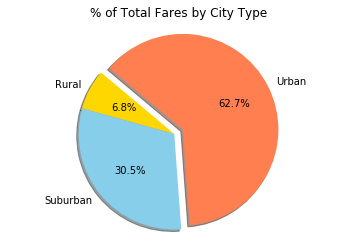

In [5]:
# Calculate Type Percents
fares_by_type = type_group["fare"].sum()

# Build Pie Chart
types = fares_by_type.keys().tolist()
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.1)

plt.pie(fares_by_type.tolist(), explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../Images/total_fares_by_type.png")

# Show Figure
plt.show()

## Total Rides by City Type

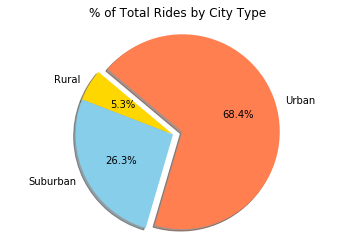

In [6]:
# Calculate Ride Percents
rides_by_type = type_group["ride_id"].count()

# Build Pie Chart
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.1)

plt.pie(rides_by_type.tolist(), explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Images/total_rides_by_type.png")

# Show Figure
plt.show()

## Total Drivers by City Type

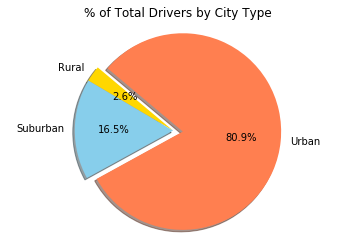

In [7]:
# Calculate Driver Percents
city_data_group = city_data.groupby("type")
drivers_by_type = city_data_group["driver_count"].sum()

# Build Pie Chart
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.1)

plt.pie(drivers_by_type.tolist(), explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("../Images/total_drivers_by_type.png")

# Show Figure
plt.show()

## Three Observable Trends Based on the Data

1. In most cases, as city gets more urban, there would be a significantly more total number of rides, lower average fare, and more drivers within the city.

2. The urban cities with the largest total number of rides (close to 40) don't have the lowest average fare. Rather, urban cities that has total number of rides within the range of 18 to 30 have lower average fare (approximately from `$`20 to `$`25 based on the scatter plot).

3. For cities with the same total number of rides, suburban cities would have a higher average fare(`$`28 to `$`35) comparing to that in urban cities(`$`20 to `$`30). 